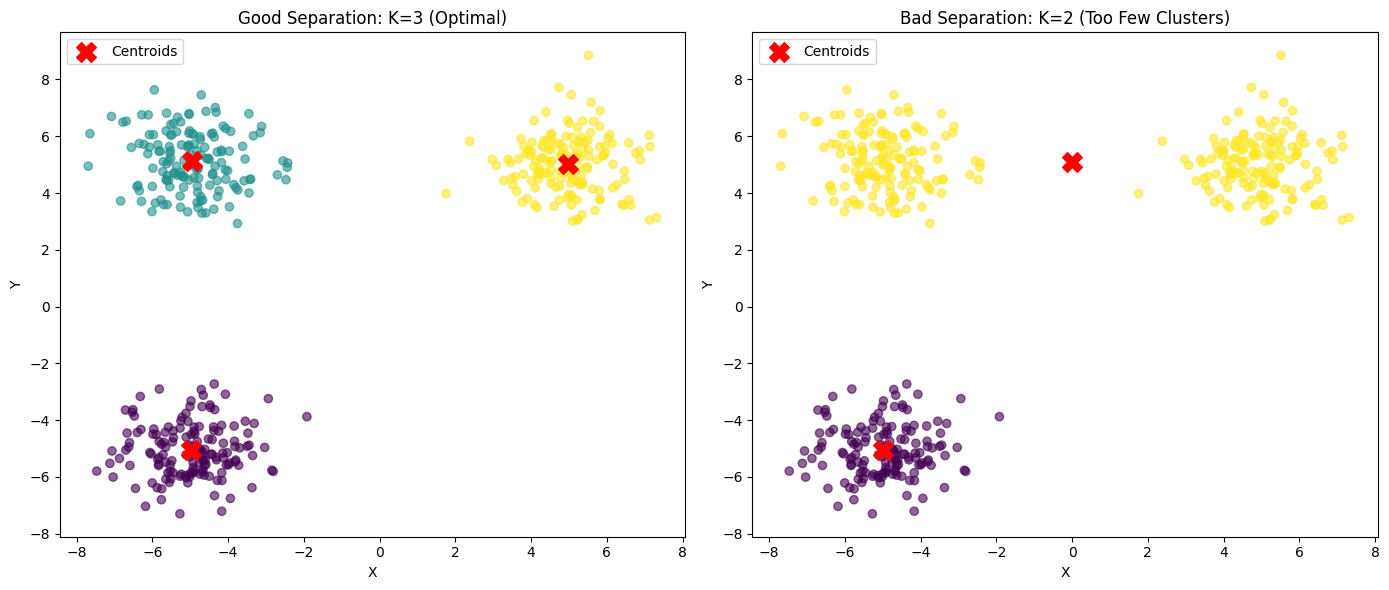

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# -----------------------------
# Step 1: Generate Data
# -----------------------------
np.random.seed(42)
num_points = 150

# Generate data for three clusters
data1 = np.random.randn(num_points, 2) + np.array([5, 5])
data2 = np.random.randn(num_points, 2) + np.array([-5, -5])
data3 = np.random.randn(num_points, 2) + np.array([-5, 5])
data = np.concatenate([data1, data2, data3])

# -----------------------------
# Step 2: Apply K-Means with Optimal Clusters (Good Separation)
# -----------------------------
# Using K=3, which is the correct number for our data.
kmeans_good = KMeans(n_clusters=3, random_state=42)
assignments_good = kmeans_good.fit_predict(data)
centroids_good = kmeans_good.cluster_centers_

# -----------------------------
# Step 3: Apply K-Means with Incorrect Cluster Number (Bad Separation)
# -----------------------------
# Here we choose K=2 (too few clusters) so that natural groups get merged.
kmeans_bad = KMeans(n_clusters=2, random_state=42)
assignments_bad = kmeans_bad.fit_predict(data)
centroids_bad = kmeans_bad.cluster_centers_

# -----------------------------
# Step 4: Create Visualizations
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Good Separation Plot: K=3
scatter1 = ax1.scatter(data[:, 0], data[:, 1],
                       c=assignments_good, cmap='viridis', alpha=0.6)
ax1.scatter(centroids_good[:, 0], centroids_good[:, 1],
            marker='X', s=200, c='red', label='Centroids')
ax1.set_title("Good Separation: K=3 (Optimal)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.legend()

# Bad Separation Plot: K=2
scatter2 = ax2.scatter(data[:, 0], data[:, 1],
                       c=assignments_bad, cmap='viridis', alpha=0.6)
ax2.scatter(centroids_bad[:, 0], centroids_bad[:, 1],
            marker='X', s=200, c='red', label='Centroids')
ax2.set_title("Bad Separation: K=2 (Too Few Clusters)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.legend()

plt.tight_layout()
plt.savefig("separation.jpg")  # Save the figure as a JPEG file.
plt.show()